In [1]:
import pandas as pd
from typing import Type
import sys

sys.path.append("..")
from utils import print_memory_stats, change_obj_to_cat, get_memory_stats

file_name = "flights.csv"
column_types_path = "column_types.pkl"
ten_columns_path = "10_columns.csv"


def change_types(my_df: pd.DataFrame):
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_no_opt.json")
    print("before:")
    print(my_df.info(memory_usage="deep"))
    change_obj_to_cat(my_df)
    memory_stats = get_memory_stats(my_df, file_name)
    print_memory_stats(memory_stats[0], memory_stats[1], memory_stats[2], "mem_res_opt.json")
    print("after:")
    print(my_df.info(memory_usage="deep"))


def save_10_columns(my_df: pd.DataFrame):
    column_names = [
        "YEAR",
        "MONTH",
        "DAY",
        "AIRLINE",
        "FLIGHT_NUMBER",
        "ORIGIN_AIRPORT",
        "DESTINATION_AIRPORT",
        "DEPARTURE_DELAY",
        "DISTANCE",
        "CANCELLED",
    ]
    types = my_df.dtypes.to_dict()
    first_chunk = True
    for chunk in pd.read_csv(
        file_name,
        usecols=lambda x: x in column_names,
        dtype=types,
        chunksize=100_000,
    ):
        chunk.to_csv(ten_columns_path, mode= 'w' if first_chunk else 'a', header=first_chunk, index=False)
        first_chunk = False

    with open(column_types_path, "wb") as file:
        pd.to_pickle(types, file)


my_df = pd.read_csv(file_name)
change_types(my_df)
save_10_columns(my_df)

with open(column_types_path, "rb") as file:
    loaded_column_types = pd.read_pickle(file)
df = pd.read_csv(ten_columns_path, dtype=loaded_column_types)
df

/tmp/ipykernel_35169/318658375.py:53: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  my_df = pd.read_csv(file_name)


before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int

,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,CANCELLED
0,2015,1,1,AS,98,ANC,SEA,-11.0,1448,0
1,2015,1,1,AA,2336,LAX,PBI,-8.0,2330,0
2,2015,1,1,US,840,SFO,CLT,-2.0,2296,0
3,2015,1,1,AA,258,LAX,MIA,-5.0,2342,0
4,2015,1,1,AS,135,SEA,ANC,-1.0,1448,0
...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,B6,688,LAX,BOS,-4.0,2611,0
5819075,2015,12,31,B6,745,JFK,PSE,-4.0,1617,0
5819076,2015,12,31,B6,1503,JFK,SJU,-9.0,1598,0
5819077,2015,12,31,B6,333,MCO,SJU,-6.0,1189,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

    MONTH  DEPARTURE_DELAY
0       1         9.759471
1       2        11.885284
2       3         9.660903
3       4         7.721885
4       5         9.454144
5       6        13.986015
6       7        11.394664
7       8         9.932045
8       9         4.823560
9      10         4.982661
10     11         6.944197
11     12        11.783529


Text(0, 0.5, 'Average Departure Delay (minutes)')

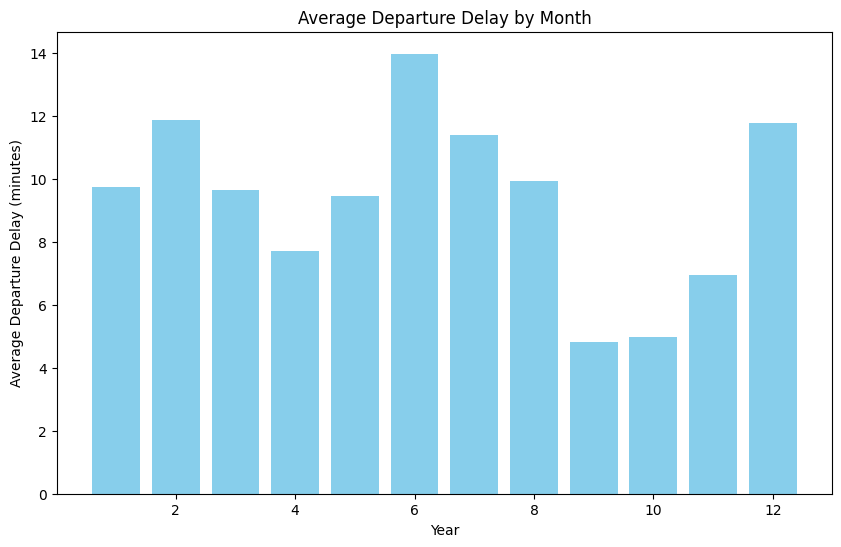

In [8]:
average_delay_by_airline = df.groupby('MONTH')['DEPARTURE_DELAY'].mean().reset_index()

print(average_delay_by_airline)

plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_airline['MONTH'], average_delay_by_airline['DEPARTURE_DELAY'], color='skyblue')
plt.title('Average Departure Delay by Month')
plt.xlabel('Year')
plt.ylabel('Average Departure Delay (minutes)')

Text(0, 0.5, 'Number of Flights')

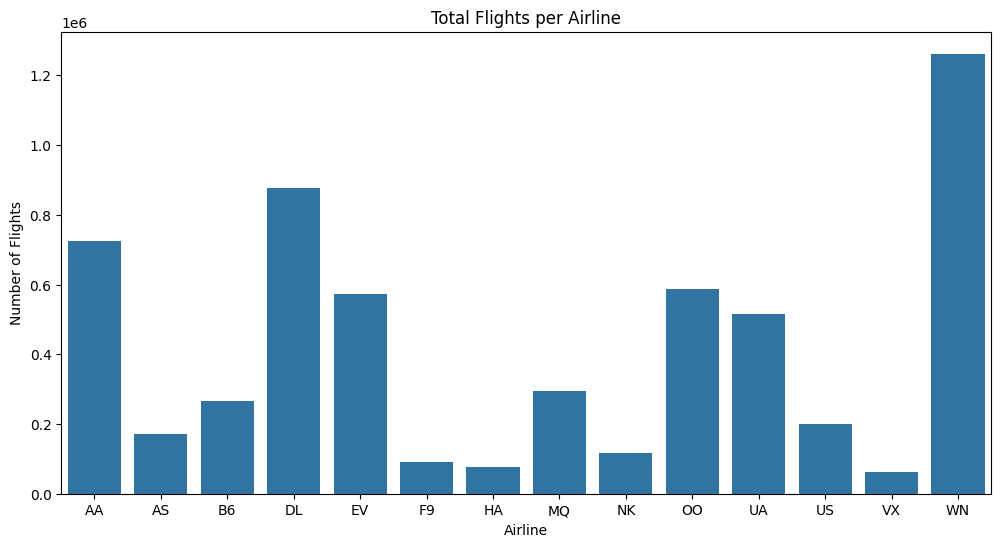

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AIRLINE', data=df)
plt.title('Total Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

Text(0, 0.5, 'Departure Delay (minutes)')

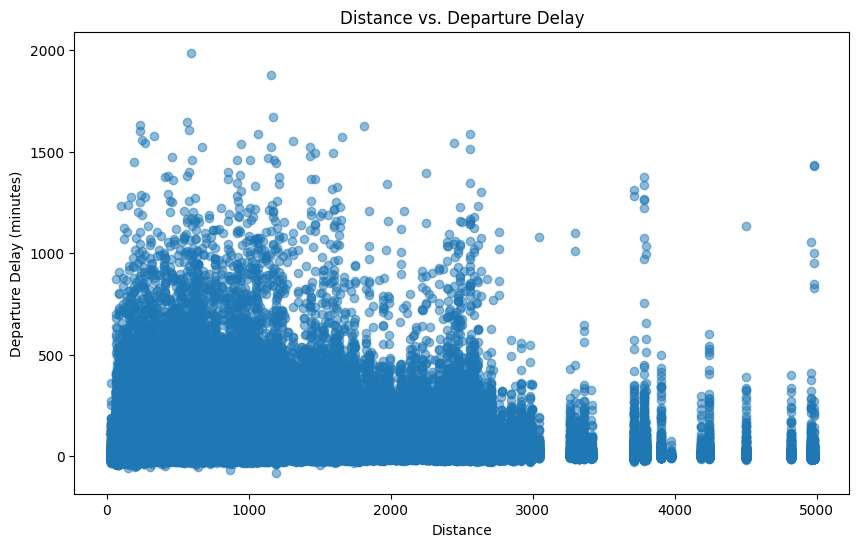

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DISTANCE'], df['DEPARTURE_DELAY'], alpha=0.5)
plt.title('Distance vs. Departure Delay')
plt.xlabel('Distance')
plt.ylabel('Departure Delay (minutes)')

Text(0.5, 1.0, 'Cancellation Percentage')

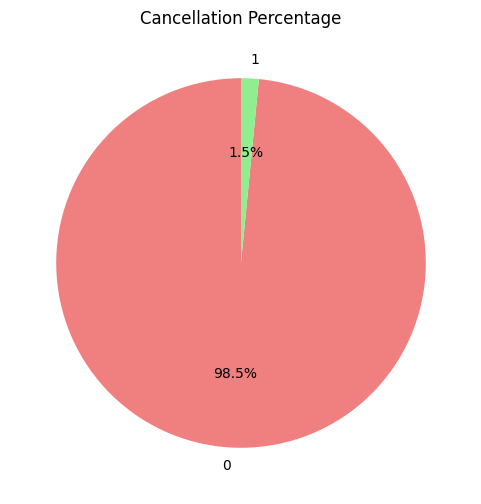

In [12]:
cancelled_counts = df['CANCELLED'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cancelled_counts, labels=cancelled_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Cancellation Percentage')

   AIRLINE  DEPARTURE_DELAY
0       AA         8.900856
1       AS         1.785801
2       B6        11.514353
3       DL         7.369254
4       EV         8.715935
5       F9        13.350859
6       HA         0.485713
7       MQ        10.125188
8       NK        15.944766
9       OO         7.801104
10      UA        14.435441
11      US         6.141137
12      VX         9.022595
13      WN        10.581986


/tmp/ipykernel_35169/3124364294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().reset_index()


Text(0, 0.5, 'Average Departure Delay (minutes)')

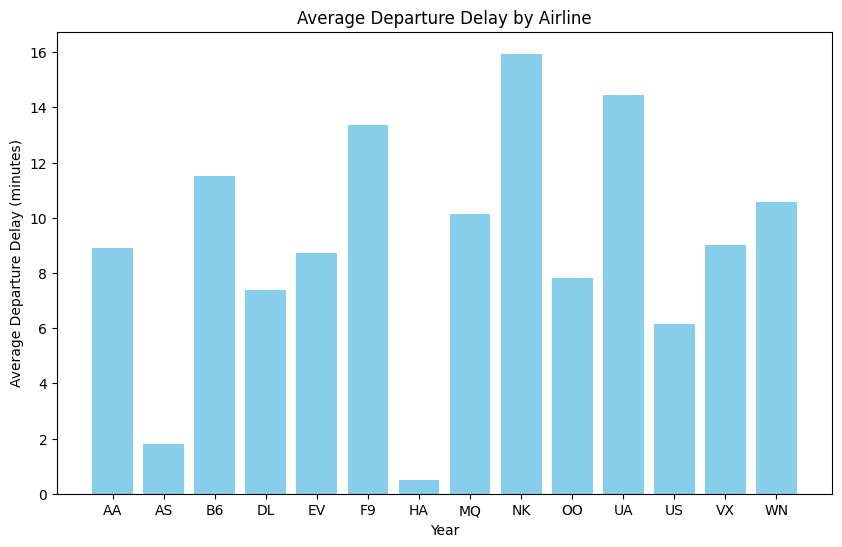

In [18]:
average_delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().reset_index()

print(average_delay_by_airline)

plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_airline['AIRLINE'], average_delay_by_airline['DEPARTURE_DELAY'], color='skyblue')
plt.title('Average Departure Delay by Airline')
plt.xlabel('Year')
plt.ylabel('Average Departure Delay (minutes)')